In [132]:
# Importing dependencies
import math 
import numpy as np
import pandas as pd
import datetime
from pandas import Series, DataFrame
## Note: Install pandas_datareader
## pip install pandas-datareader
import pandas_datareader.data as web
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


In [133]:
## Loading Yahoo Finance data set form 2016
# Get start and end dates 
start_date = datetime.datetime(2016, 1, 1)
## Select today's date as end date
end_date = datetime.datetime.now().date().isoformat() 

stocks_df = web.DataReader('FB', 'yahoo', start_date, end_date)

# Displaying letest 5 records
stocks_df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-04,205.910004,198.759995,200.199997,205.259995,19250700,205.259995
2020-05-05,210.380005,206.500000,207.020004,207.070007,21071200,207.070007
2020-05-06,211.600006,206.660004,208.119995,208.470001,21857000,208.470001
2020-05-07,211.600006,209.039993,211.160004,211.259995,15152000,211.259995
2020-05-08,213.210007,210.850006,212.240005,212.350006,12506000,212.350006


In [134]:
## Getting Final Closing price
closing_price_df= stocks_df['Adj Close']

closing_price_df.index = pd.to_datetime(closing_price_df.index)

closing_price_df.tail()

closing_price_df.head()

Date
2016-01-04    102.220001
2016-01-05    102.730003
2016-01-06    102.970001
2016-01-07     97.919998
2016-01-08     97.330002
Name: Adj Close, dtype: float64

In [135]:
## Calculate 50 day Moving Average
ma_50day= closing_price_df.rolling(window=50).mean()

ma_50day.index = pd.to_datetime(ma_50day.index)

## Removing NULL Coulumns
ma_50day.dropna(inplace=True)
ma_50day.head()

ma_50day.head()

Date
2016-03-15    103.8656
2016-03-16    104.0648
2016-03-17    104.2306
2016-03-18    104.4002
2016-03-21    104.6788
Name: Adj Close, dtype: float64

In [136]:
## Calculate 200 day Moving Average
ma_200day= closing_price_df.rolling(window=200).mean()

ma_200day.index = pd.to_datetime(ma_200day.index)

## Removing NULL Coulumns
ma_200day.dropna(inplace=True)
ma_200day.head()

ma_200day.head()

Date
2016-10-17    115.85225
2016-10-18    115.98400
2016-10-19    116.12090
2016-10-20    116.25605
2016-10-21    116.42680
Name: Adj Close, dtype: float64

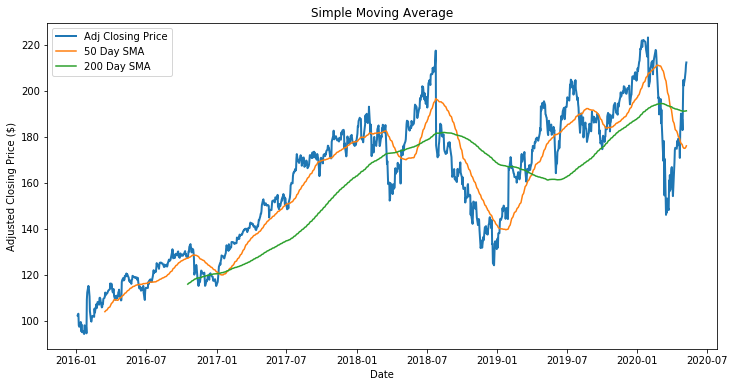

In [137]:
## Displaying Closing Price and Moving Average in Charts

#The size for our chart:
plt.figure(figsize = (12,6))
#Plotting price and SMA lines:
plt.plot(closing_price_df, label='Adj Closing Price', linewidth = 2)
plt.plot(ma_50day, label='50 Day SMA', linewidth = 1.5)
plt.plot(ma_200day, label='200 Day SMA', linewidth = 1.5)
#Adding title and labeles on the axes, making legend visible:
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price ($)')
plt.title('Simple Moving Average')
plt.legend()
plt.show()

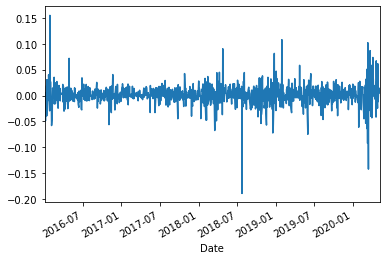

In [138]:
rets = closing_price_df / closing_price_df.shift(1) - 1
rets.plot(label='return')
plt.show()

In [139]:
## Analysing Multiple Stocks
tickers =['AMZN', 'GOOG', 'IBM', 'MSFT']
comp_stocks_df = web.DataReader(tickers,'yahoo',start_date,end_date)['Adj Close']
comp_stocks_df.head()
                      

Symbols,AMZN,GOOG,IBM,MSFT
Date,,,,
2016-01-04,636.989990,741.840027,111.328911,50.398834
2016-01-05,633.789978,742.580017,111.247025,50.628761
2016-01-06,632.650024,743.619995,110.690163,49.709072
2016-01-07,607.940002,726.390015,108.798515,47.980057
2016-01-08,607.049988,714.469971,107.791267,48.127216


In [140]:
retscomp =comp_stocks_df.pct_change()
corr = retscomp.corr()
corr.head()


Symbols,AMZN,GOOG,IBM,MSFT
Symbols,,,,
AMZN,1.000000,0.670811,0.417543,0.673639
GOOG,0.670811,1.000000,0.541744,0.785348
IBM,0.417543,0.541744,1.000000,0.600866
MSFT,0.673639,0.785348,0.600866,1.000000


In [141]:
plt.scatter(retscomp.AMZN, retscomp.MSFT)
plt.xlabel(‘Returns MSFT’)
plt.ylabel(‘Returns AMZN’)

plt.title('Scatter Plot of AMZN and MSFT')
plt.legend()
plt.show()


SyntaxError: invalid character in identifier (<ipython-input-141-1a24eb7bc933>, line 2)

In [ ]:
#pd.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

In [ ]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

In [ ]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [ ]:
#Predicting Stock prices 

In [142]:
#high low percentage 
dfreg = stocks_df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (stocks_df['High'] - stocks_df['Low']) / stocks_df['Close'] *100.0
#percentage change 
dfreg['PCT_change'] = (stocks_df['Close'] - stocks_df['Open']) / stocks_df['Open']  * 100.0
dfreg

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2016-01-04,102.220001,37912400,2.435920,0.264840
2016-01-05,102.730003,23258200,1.985789,-0.155502
2016-01-06,102.970001,25096200,2.787215,1.819444
2016-01-07,97.919998,45172900,4.217726,-2.567166
2016-01-08,97.330002,35402300,3.565192,-2.553059
...,...,...,...,...
2020-05-04,205.259995,19250700,3.483391,2.527471
2020-05-05,207.070007,21071200,1.873765,0.024154
2020-05-06,208.470001,21857000,2.369647,0.168175


In [143]:
#drop missing value 
dfreg.fillna(value=99999, inplace = True)
forecast_out = int(math.ceil(0.01*len(dfreg)))

forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

#linear regression
#X = preprocessing.scale(X)

#train for model generation and evaluation 
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(dfreg['label'])
y = y[:-forecast_out]

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)
#quadratic regression
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)

/Users/janiceambrose/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.70962e-34): result may not be accurate.
  overwrite_a=True).T
/Users/janiceambrose/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.04349e-50): result may not be accurate.
  overwrite_a=True).T


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [147]:
#KNN Regression 
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [151]:
#evaluation 
conf_reg = clfreg.score(X_test, y_test)
confpoly2 = clfpoly2.score(X_test, y_test)
confpoly3 = clfpoly3.score(X_test, y_test)
confidenceknn = clfknn.score(X_test, y_test)


0.902640115386445

In [155]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
forecast_set

array([191.54990963, 188.1837365 , 185.22907692, 191.73701731,
       202.68987939, 201.99275306, 204.57470538, 204.22774733,
       206.14309605, 207.74508456, 208.88960301])

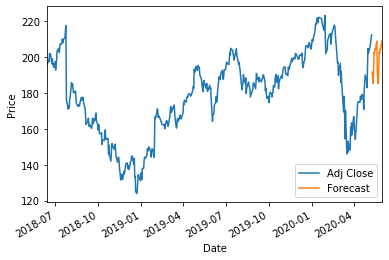

In [157]:
#plotting prediciton 
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()